* C:\acor\Scripts>pip install keras
* C:\acor\Scripts>pip install theano

* Run below at Anaconda Prompt: (base) C:\>conda install m2w64-toolchain

In [44]:
import numpy
import theano
import keras
print (numpy.__version__)
print (theano.__version__)
print(str(keras.__version__))

1.14.3
1.0.4
2.2.2


In [45]:
import numpy as np
np.random.seed(123)  # for reproducibility

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from keras.utils import np_utils

In [47]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [48]:
# 60,000 samples in the training set, and the images are 28 pixels x 28 pixels each
print(X_train.shape)

(60000, 28, 28)


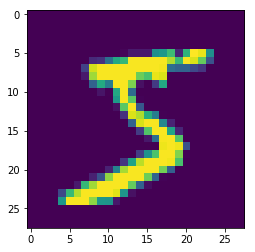

In [49]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

### Long Short-Term Memory
* Forecasting time series with LSTM models
* This is for pattern recognition not forecasting to be precise!!!

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [57]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [60]:
dataset_train.iloc[:, 1:2].head()

,Open
0,210.60
1,214.95
2,219.00
3,219.95
4,222.00


In [58]:
training_set

array([[210.6 ],
       [214.95],
       [219.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

### Feature Scaling

In [100]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [101]:
training_set_scaled[59:62,0]

array([0.54501217, 0.51459854, 0.55109489])

In [102]:
type(training_set_scaled)

numpy.ndarray

In [103]:
X_train = []
X_train.append(training_set_scaled[60-60: 60, 0])
X_train 

[array([0.52514193, 0.54278183, 0.55920519, 0.56305758, 0.57137064,
        0.57035685, 0.57055961, 0.5648824 , 0.54521492, 0.52676399,
        0.52068127, 0.52514193, 0.52189781, 0.53406326, 0.53081914,
        0.53629359, 0.49493106, 0.46188159, 0.49432279, 0.51682887,
        0.52473642, 0.51865369, 0.5419708 , 0.55717762, 0.54805353,
        0.55109489, 0.55271695, 0.55900243, 0.55291971, 0.55920519,
        0.54298459, 0.57542579, 0.57137064, 0.56934307, 0.55494728,
        0.56549067, 0.53892944, 0.52676399, 0.54298459, 0.54298459,
        0.5663017 , 0.55312247, 0.56326034, 0.55515004, 0.55596107,
        0.56690998, 0.55109489, 0.57542579, 0.55474453, 0.56366586,
        0.56772101, 0.60158151, 0.60502839, 0.6350365 , 0.63260341,
        0.6025953 , 0.58860503, 0.54298459, 0.54298459, 0.54501217])]

In [104]:
y_train = []
y_train.append(training_set_scaled[60, 0])
y_train

[0.5145985401459854]

In [105]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [106]:
X_train.shape[0]

1975

In [107]:
X_train.shape[1]

60

In [108]:
X_train.shape

(1975, 60, 1)

In [109]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [110]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
1975/1975 [==============================] - 16s 8ms/step - loss: 0.0106
Epoch 2/50
1975/1975 [==============================] - 11s 5ms/step - loss: 0.0032
Epoch 3/50
1975/1975 [==============================] - 11s 6ms/step - loss: 0.0029
Epoch 4/50
1975/1975 [==============================] - 13s 7ms/step - loss: 0.0026
Epoch 5/50
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0024
Epoch 6/50
1975/1975 [==============================] - 11s 5ms/step - loss: 0.0024
Epoch 7/50
1975/1975 [==============================] - 16s 8ms/step - loss: 0.0021
Epoch 8/50
1975/1975 [==============================] - 19s 10ms/step - loss: 0.0022
Epoch 9/50
1975/1975 [==============================] - 11s 5ms/step - loss: 0.0020: 5s - loss: 0.
Epoch 10/50
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0019
Epoch 11/50
1975/1975 [==============================] - 15s 7ms/step - loss: 0.0018
Epoch 12/50
1975/1975 [==============================] - 2

In [111]:
regressor.save('my_model.h5') 

In [112]:
regressor.layers

In [149]:
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

model = load_model('my_model.h5')

In [150]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [151]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [152]:
predicted_stock_price

array([[120.81096],
       [142.49695],
       [177.23477],
       [207.92577],
       [224.7245 ],
       [230.68936],
       [230.20514],
       [225.56923],
       [219.8646 ],
       [213.32841],
       [208.56424],
       [207.04312],
       [206.43526],
       [208.43074],
       [213.42812],
       [220.33684]], dtype=float32)

In [153]:
real_stock_price=real_stock_price[::-1]
predicted_stock_price=predicted_stock_price[::-1]

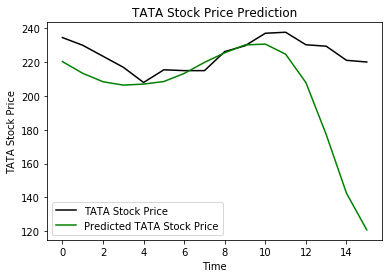

In [154]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [155]:
real_stock_price

array([[234.55],
       [230.  ],
       [223.5 ],
       [217.  ],
       [208.  ],
       [215.5 ],
       [215.  ],
       [215.  ],
       [226.25],
       [229.7 ],
       [237.1 ],
       [237.7 ],
       [230.3 ],
       [229.45],
       [221.1 ],
       [220.1 ]])

In [156]:
predicted_stock_price

array([[220.33684],
       [213.42812],
       [208.43074],
       [206.43526],
       [207.04312],
       [208.56424],
       [213.32841],
       [219.8646 ],
       [225.56923],
       [230.20514],
       [230.68936],
       [224.7245 ],
       [207.92577],
       [177.23477],
       [142.49695],
       [120.81096]], dtype=float32)